# DATA LOADING

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [418]:
train_data = pd.read_excel('D:/606/flight/Data_Train.xlsx')
test_data=pd.read_excel("D:/606/flight/Test_set.xlsx")

In [419]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [420]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [421]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

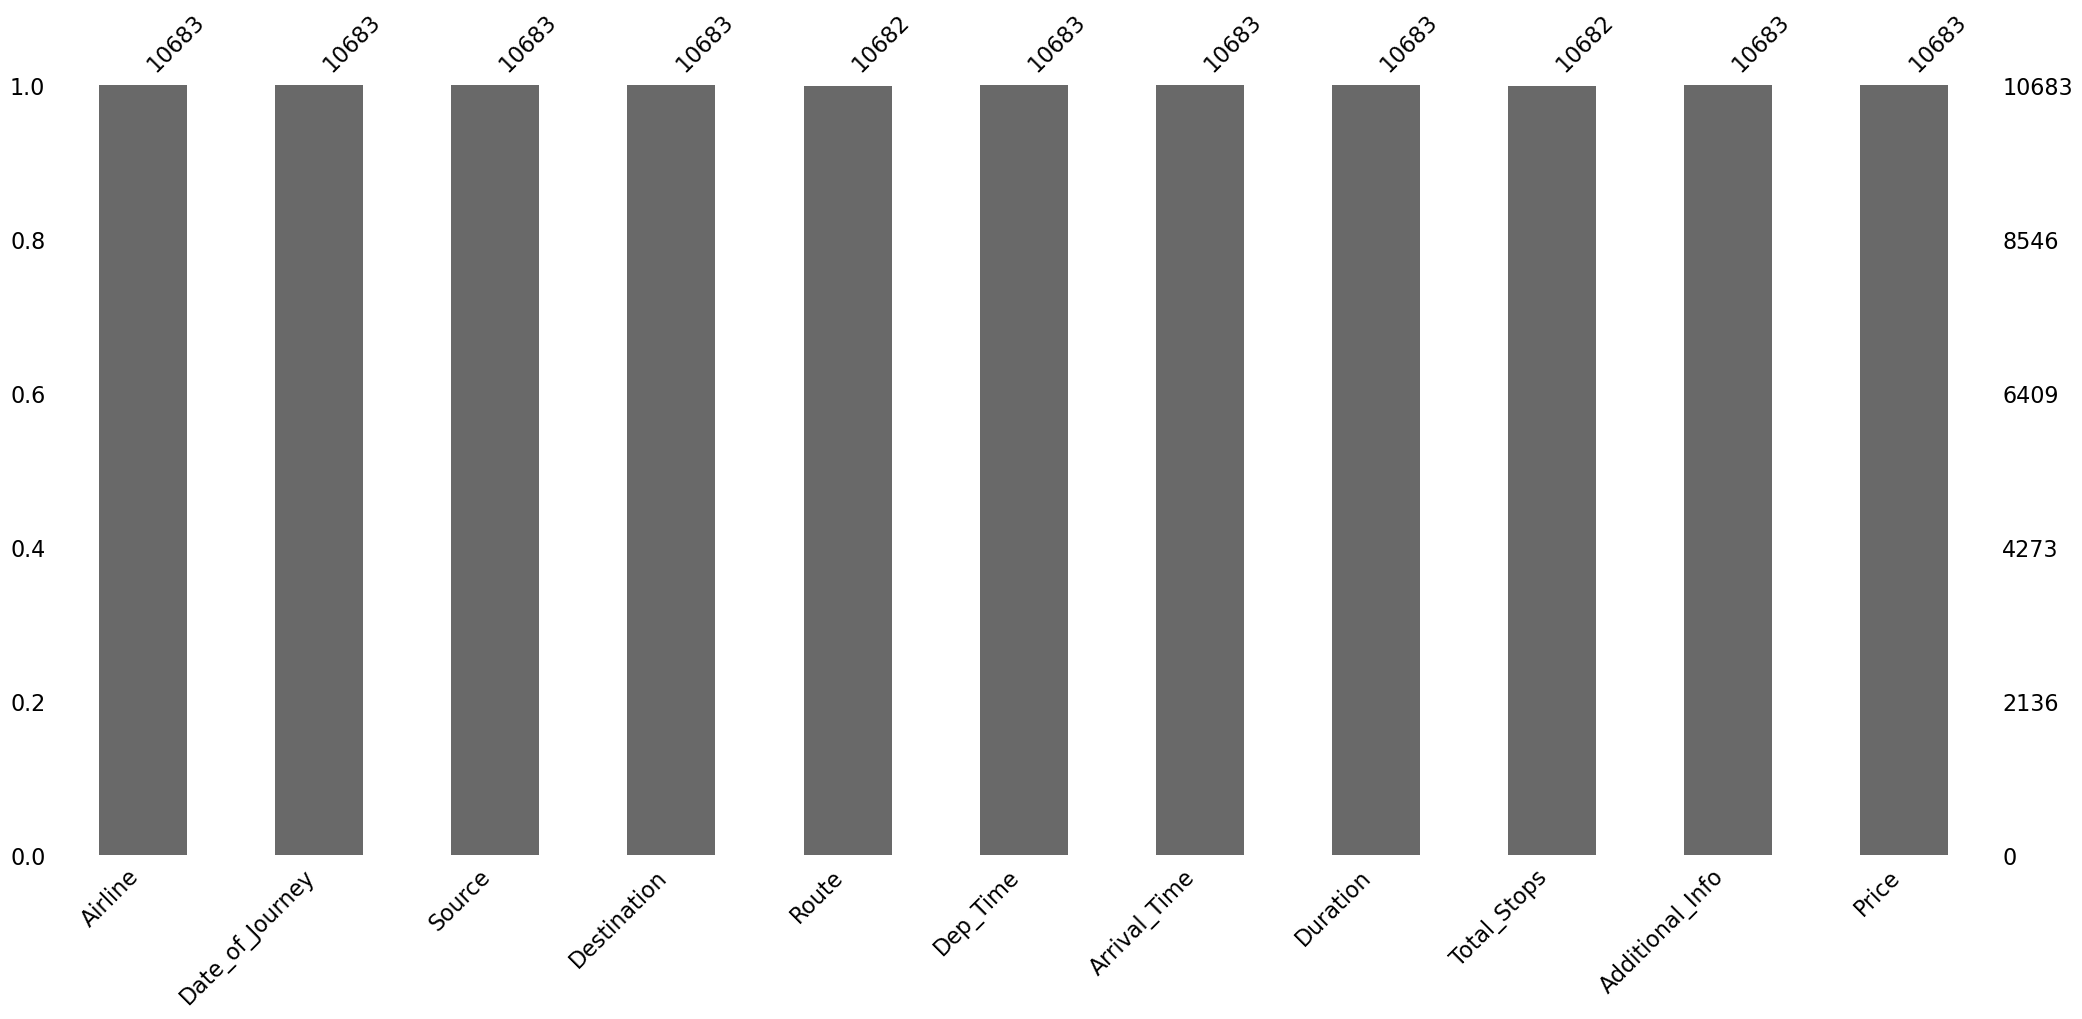

In [422]:
import missingno as msno
msno.bar(train_data)
plt.show

We find two missing values, which are so insignificant that I can just ignore them.

In [423]:
train_data[train_data['Total_Stops'].isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

In [424]:
train_data.dropna(inplace=True)

In [425]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [426]:
data = train_data.copy()

In [427]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [428]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# data preprocessing - creating derived features from the given columns

In [429]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [430]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [431]:
##Creating function to convert date to time
def change_into_Datetime(col):
  data[col] = pd.to_datetime(data[col])

In [432]:
DTCols = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']

In [433]:
for col in DTCols:
  change_into_Datetime(col)


In [434]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [435]:
data['travel_day'] = data['Date_of_Journey'].dt.day
data['travel_month'] = data['Date_of_Journey'].dt.month
data['travel_year'] = data['Date_of_Journey'].dt.year

data.drop('Date_of_Journey', inplace=True, axis = 1)

In [436]:
data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-10-21 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-10-21 05:50:00 2023-10-21 13:15:00   7h 25m     2 stops   
2 2023-10-21 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-10-21 18:05:00 2023-10-21 23:30:00   5h 25m      1 stop   
4 2023-10-21 16:50:00 2023-10-21 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  travel_day  travel_month  travel_year  
0         No info   3897          24             3         2019  
1         No info   7662           5             1         2019  
2         No info  13882           6             9         2019  
3         No info   6218           5            12         2019  
4         No info  13302           3             1         2019

In [437]:
data.shape

(10682, 13)

In [438]:
##Creating a function converstion of Hours to Minutes
def extract_hr_min(df, col):
  df[col+'_hour'] = df[col].dt.hour
  df[col+'_min'] = df[col].dt.minute
  return df.head(3)

In [439]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'travel_day',
       'travel_month', 'travel_year'],
      dtype='object')

In [440]:
extract_hr_min(data, 'Arrival_Time')

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-10-21 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-10-21 05:50:00 2023-10-21 13:15:00   7h 25m     2 stops   
2 2023-10-21 09:25:00 2023-06-10 04:25:00      19h     2 stops   

  Additional_Info  Price  travel_day  travel_month  travel_year  \
0         No info   3897          24             3         2019   
1         No info   7662           5             1         2019   
2         No info  13882           6             9         2019   

   Arrival_Time_hour  Arrival_Time_min  
0                  1                10  
1                 13                15  
2                  4                25

In [441]:
extract_hr_min(data, 'Dep_Time')

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-10-21 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-10-21 05:50:00 2023-10-21 13:15:00   7h 25m     2 stops   
2 2023-10-21 09:25:00 2023-06-10 04:25:00      19h     2 stops   

  Additional_Info  Price  travel_day  travel_month  travel_year  \
0         No info   3897          24             3         2019   
1         No info   7662           5             1         2019   
2         No info  13882           6             9         2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  
0                  1                10             22            20  
1                 13                15              5            50  
2                  4                25              9            25

In [442]:
data.drop(['Arrival_Time', 'Dep_Time'], inplace = True, axis=1)

In [443]:
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  travel_day  travel_month  travel_year  \
0    non-stop         No info   3897          24             3         2019   
1     2 stops         No info   7662           5             1         2019   
2     2 stops         No info  13882           6             9         2019   
3      1 stop         No info   6218           5            12         2019   
4      1 stop         No info  13302           3             1         2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  
0                  1                10             22            20  
1                 13                15              5            50  
2                  4                25              9            25  
3                 23                30             18             5  
4                 21                35             16            50

In [444]:
##Creating a function for the Flight Departure Time Categorization Function
def flight_dep_time(x):
  if(x>4) and (x<=8):
    return 'Early Morning'
  elif (x>8) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=16):
    return 'AfterNoon'
  elif (x>16) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else :
    return 'Late Night'

# Exploratory Data Analysis and Visualization

In [445]:
#2> Price variation analysis through out the day

# Assuming you have a DataFrame named 'data' with a column 'Dep_Time_hour'

# Calculate the value counts and create a DataFrame
value_counts_df = data['Dep_Time_hour'].apply(flight_dep_time).value_counts().reset_index()
value_counts_df.columns = ['Time', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(value_counts_df, x='Time', y='Count', title='Flight Departure Times')
fig.show()


In [446]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + ' ' + '0m'

  return x

data['Duration'] = data['Duration'].apply(preprocess_duration)

In [447]:
data['duration_min'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['duration_hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [448]:
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  travel_day  travel_month  travel_year  \
0    non-stop         No info   3897          24             3         2019   
1     2 stops         No info   7662           5             1         2019   
2     2 stops         No info  13882           6             9         2019   
3      1 stop         No info   6218           5            12         2019   
4      1 stop         No info  13302           3             1         2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  \
0                  1                10             22            20   
1                 13                15              5            50   
2                  4                25              9            25   
3                 23                30             18             5   
4                 21                35             16            50   

   duration_min  duration_hour  
0             2             50  
1             7             25  
2            19              0  
3             5             25  
4             4             45

In [449]:
#Lets analyse whether duration impacts on fare prices or not

#converting duration into total number of travel time in mins

In [450]:
 data['total_duration_min'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [451]:
fig = px.scatter(data, x='total_duration_min', y='Price', color='Total_Stops')
fig.update_xaxes(title_text="Total_duration_min")
fig.update_yaxes(title_text="Price in INR")
fig.show()



In [452]:
#let's use regression plot and find the relationship

fig = px.scatter(data, x='total_duration_min', y='Price', trendline='ols')
fig.update_xaxes(title_text="Total_duration_min")
fig.update_yaxes(title_text="Price in INR")
fig.show()


In [453]:


#3> On which route Jet Airways is extremely used?

#let's extract jet airways data

In [454]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [455]:
  # 1> Airline vs Price Analysis`

data_sorted = data.sort_values('Price', ascending=False)

fig = px.box(data_sorted, x='Airline', y='Price')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better readability
fig.update_xaxes(title_text="Airline")
fig.update_yaxes(title_text="Price in INR")

fig.show()


The data clearly shows that Jet Airways Business Class has the highest prices. However, apart from the top Airline, the others have almost comparable median prices.

In [456]:
data_sorted = data_sorted.sort_values("Price", ascending=False)

fig = px.violin(data_sorted, y="Price", x="Source", 
                title="Price Distribution by Source (Violin Plot)",
                height=400, width=900)

fig.update_xaxes(title_text="Source")
fig.update_yaxes(title_text="Price in INR")

fig.show()


In [457]:


data_sorted = data_sorted.sort_values("Price", ascending=False)

fig = px.box(data_sorted, y="Price", x="Destination", 
             title="Price Distribution by Destination (Box Plot)",
             height=400, width=900)
fig.update_xaxes(title_text="Destination")
fig.update_yaxes(title_text="Price in INR")

fig.show()


Here, we've found that New Delhi has the most outliers and Kolkata has the least by using a cat plot to draw the box plot between flight cost and passenger origin and destination.

In [458]:
#Feature Engieering

For nominal data (Order less categories) we are going to use One-Hot Encoding & for ordinal data we are going to use Label Encoding

In [459]:
#considering categorical values
cat_var = [col for col in data.columns if data[col].dtype == 'object']

In [460]:
cat_var

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [461]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

let's implement one-hot encoding algorithm without any library

In [462]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [463]:
for city in data['Source'].unique():
  data['source_' + city] = data['Source'].apply(lambda x : 1 if x == city else 0)

In [464]:
data.head(3)

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   

  Total_Stops Additional_Info  Price  travel_day  travel_month  ...  \
0    non-stop         No info   3897          24             3  ...   
1     2 stops         No info   7662           5             1  ...   
2     2 stops         No info  13882           6             9  ...   

   Dep_Time_hour  Dep_Time_min  duration_min  duration_hour  \
0             22            20             2             50   
1              5            50             7             25   
2              9            25            19              0   

   total_duration_min  source_Banglore  source_Kolkata  source_Delhi  \
0                 170                1               0             0   
1                 445                0               1             0   
2                1140                0               0             1   

   source_Chennai  source_Mumbai  
0               0              0  
1               0              0  
2               0              0  

[3 rows x 23 columns]

In [465]:
data.drop('Source', axis =1, inplace = True)

In [466]:
airline = data.groupby(['Airline'])['Price'].mean().sort_values(ascending = True).index

In [467]:
dict_airline = {key:index for index, key in enumerate(airline, 0)}


In [468]:
data['Airline'] = data['Airline'].map(dict_airline)


In [469]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [470]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [471]:
#In Destination col both Delhi and New Delhi were same so let's replace one of the term with other
data['Destination']= data['Destination'].replace("New Delhi", "Delhi")

In [472]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [473]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [474]:
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [475]:
dict_dest = {key:index for index, key in enumerate(destination, 0)}

In [476]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [477]:
data['Destination'] = data['Destination'].map(dict_dest)

In [478]:
data.head(3)

Airline  Destination                  Route Duration Total_Stops  \
0        3            2              BLR → DEL   2h 50m    non-stop   
1        7            3  CCU → IXR → BBI → BLR   7h 25m     2 stops   
2       10            4  DEL → LKO → BOM → COK   19h 0m     2 stops   

  Additional_Info  Price  travel_day  travel_month  travel_year  ...  \
0         No info   3897          24             3         2019  ...   
1         No info   7662           5             1         2019  ...   
2         No info  13882           6             9         2019  ...   

   Dep_Time_hour  Dep_Time_min  duration_min  duration_hour  \
0             22            20             2             50   
1              5            50             7             25   
2              9            25            19              0   

   total_duration_min  source_Banglore  source_Kolkata  source_Delhi  \
0                 170                1               0             0   
1                 445                0               1             0   
2                1140                0               0             1   

   source_Chennai  source_Mumbai  
0               0              0  
1               0              0  
2               0              0  

[3 rows x 22 columns]

In [479]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [480]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [481]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [482]:
data.head()

Airline  Destination                  Route Duration  Total_Stops  \
0        3            2              BLR → DEL   2h 50m            0   
1        7            3  CCU → IXR → BBI → BLR   7h 25m            2   
2       10            4  DEL → LKO → BOM → COK   19h 0m            2   
3        3            3        CCU → NAG → BLR   5h 25m            1   
4        3            2        BLR → NAG → DEL   4h 45m            1   

  Additional_Info  Price  travel_day  travel_month  travel_year  ...  \
0         No info   3897          24             3         2019  ...   
1         No info   7662           5             1         2019  ...   
2         No info  13882           6             9         2019  ...   
3         No info   6218           5            12         2019  ...   
4         No info  13302           3             1         2019  ...   

   Dep_Time_hour  Dep_Time_min  duration_min  duration_hour  \
0             22            20             2             50   
1              5            50             7             25   
2              9            25            19              0   
3             18             5             5             25   
4             16            50             4             45   

   total_duration_min  source_Banglore  source_Kolkata  source_Delhi  \
0                 170                1               0             0   
1                 445                0               1             0   
2                1140                0               0             1   
3                 325                0               1             0   
4                 285                1               0             0   

   source_Chennai  source_Mumbai  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  

[5 rows x 22 columns]

In [483]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'travel_day', 'travel_month', 'travel_year',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'duration_min', 'duration_hour', 'total_duration_min',
       'source_Banglore', 'source_Kolkata', 'source_Delhi', 'source_Chennai',
       'source_Mumbai'],
      dtype='object')

In [484]:
#Removal of Unecessary Features --
data.drop(columns = ['Additional_Info', 'total_duration_min', 'Route', 'Duration'], axis =1, inplace=True)

In [485]:
data.head()

Airline  Destination  Total_Stops  Price  travel_day  travel_month  \
0        3            2            0   3897          24             3   
1        7            3            2   7662           5             1   
2       10            4            2  13882           6             9   
3        3            3            1   6218           5            12   
4        3            2            1  13302           3             1   

   travel_year  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0         2019                  1                10             22   
1         2019                 13                15              5   
2         2019                  4                25              9   
3         2019                 23                30             18   
4         2019                 21                35             16   

   Dep_Time_min  duration_min  duration_hour  source_Banglore  source_Kolkata  \
0            20             2             50                1               0   
1            50             7             25                0               1   
2            25            19              0                0               0   
3             5             5             25                0               1   
4            50             4             45                1               0   

   source_Delhi  source_Chennai  source_Mumbai  
0             0               0              0  
1             0               0              0  
2             1               0              0  
3             0               0              0  
4             0               0              0

In [486]:
#Outlier detection - Always better practise to plot boxplot, histogram and distribution plot to know in detail about the outliers

In [487]:
def plot(df, col):
  fig, (ax1, ax2, ax3) = plt.subplots(3,1)


  sns.distplot(df[col], ax = ax1)
  sns.boxplot(df[col], ax = ax2, orient = 'h')
  sns.distplot(df[col], ax = ax3, kde=False)

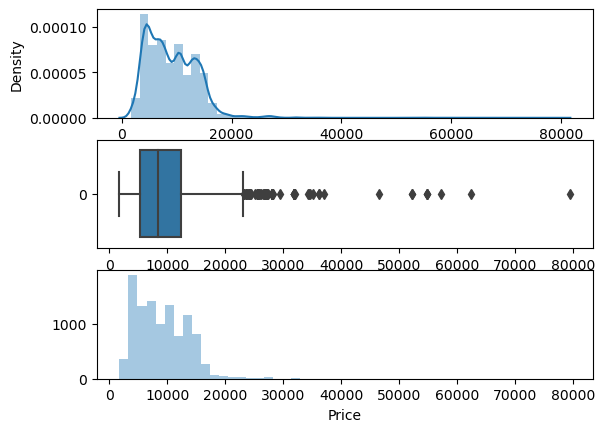

In [488]:
plot(data, 'Price')

In [489]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [490]:
#finding IQR - Inter Quantile Range

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
max_price = q3 + 1.5*iqr
min_price = q1 - 1.5*iqr

In [491]:
max_price

23017.0

In [498]:
#number of OUTLIERS
len([price for price in data['Price'] if price > max_price or price < min_price])

81

In [499]:
#In the document it is given that the max usual price of the flight fare is 35000/-,
#considering that let's replace prices which are greater than 35000 with median of the values

data['Price']=np.where(data['Price'] >=35000, data['Price'].median(), data['Price'])

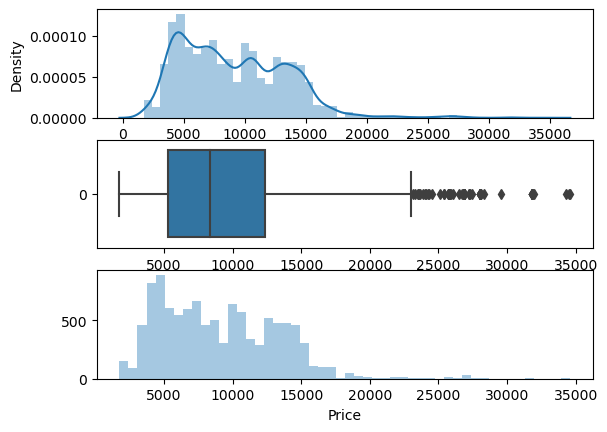

In [500]:
plot(data, 'Price')
#hence Skewness reduced

In [501]:
y= data['Price']


In [502]:
X=data.drop(['Price'], axis=1)

In [503]:
from sklearn.feature_selection import mutual_info_regression

In [504]:
imp = mutual_info_regression(X,y)

In [505]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [506]:
imp_df.columns = ['importance']

In [507]:
imp_df.sort_values(by='importance',ascending = False)

importance
Destination          0.999950
Airline              0.969810
Total_Stops          0.791053
source_Delhi         0.526435
duration_min         0.471375
source_Kolkata       0.453926
Arrival_Time_hour    0.391572
source_Banglore      0.388485
Arrival_Time_min     0.352854
Dep_Time_hour        0.346323
duration_hour        0.345130
Dep_Time_min         0.262448
travel_month         0.239181
source_Mumbai        0.202588
travel_day           0.193051
source_Chennai       0.139941
travel_year          0.009731

Based on the factors with the strongest positive correlation to the dependent variable (Price) are travel destination (1.000836) and airline (0.971937). It seems that the price of a plane ticket is significantly affected by both the location and the airline of choice.

In [508]:
data.corr()['Price']

Airline              0.612236
Destination          0.386265
Total_Stops          0.633635
Price                1.000000
travel_day          -0.165545
travel_month         0.025825
travel_year               NaN
Arrival_Time_hour    0.030389
Arrival_Time_min    -0.090662
Dep_Time_hour        0.006235
Dep_Time_min        -0.033104
duration_min         0.544661
duration_hour       -0.126571
source_Banglore     -0.142335
source_Kolkata       0.017079
source_Delhi         0.291908
source_Chennai      -0.187463
source_Mumbai       -0.241168
Name: Price, dtype: float64

In [509]:
#Seasonal Pricing Analysis

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [510]:
data['travel_month_string'] = [month_mapping[month] for month in data['travel_month']]

In [511]:
data['travel_month_string'].value_counts()


June         2535
March        2211
May          2074
September    1406
January      1075
December      957
April         424
Name: travel_month_string, dtype: int64

In [512]:
##Seasonal Month Analysis
mean_price_by_month = data.groupby('travel_month_string')['Price'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(mean_price_by_month, x='travel_month_string', y='Price',
             title='Mean Price by Travel Month',
             labels={'travel_month_string': 'Travel Month', 'Price': 'Mean Price in INR'})
fig.show()


# Data Modeling

In [513]:
data.head()

Airline  Destination  Total_Stops    Price  travel_day  travel_month  \
0        3            2            0   3897.0          24             3   
1        7            3            2   7662.0           5             1   
2       10            4            2  13882.0           6             9   
3        3            3            1   6218.0           5            12   
4        3            2            1  13302.0           3             1   

   travel_year  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0         2019                  1                10             22   
1         2019                 13                15              5   
2         2019                  4                25              9   
3         2019                 23                30             18   
4         2019                 21                35             16   

   Dep_Time_min  duration_min  duration_hour  source_Banglore  source_Kolkata  \
0            20             2             50                1               0   
1            50             7             25                0               1   
2            25            19              0                0               0   
3             5             5             25                0               1   
4            50             4             45                1               0   

   source_Delhi  source_Chennai  source_Mumbai travel_month_string  
0             0               0              0               March  
1             0               0              0             January  
2             1               0              0           September  
3             0               0              0            December  
4             0               0              0             January

In [514]:
final_data=data.drop('travel_month_string',axis=1)
final_data

Airline  Destination  Total_Stops    Price  travel_day  travel_month  \
0            3            2            0   3897.0          24             3   
1            7            3            2   7662.0           5             1   
2           10            4            2  13882.0           6             9   
3            3            3            1   6218.0           5            12   
4            3            2            1  13302.0           3             1   
...        ...          ...          ...      ...         ...           ...   
10678        2            3            0   4107.0           4             9   
10679        7            3            0   4145.0          27             4   
10680       10            2            0   7229.0          27             4   
10681        5            2            0  12648.0           3             1   
10682        7            4            2  11753.0           5             9   

       travel_year  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0             2019                  1                10             22   
1             2019                 13                15              5   
2             2019                  4                25              9   
3             2019                 23                30             18   
4             2019                 21                35             16   
...            ...                ...               ...            ...   
10678         2019                 22                25             19   
10679         2019                 23                20             20   
10680         2019                 11                20              8   
10681         2019                 14                10             11   
10682         2019                 19                15             10   

       Dep_Time_min  duration_min  duration_hour  source_Banglore  \
0                20             2             50                1   
1                50             7             25                0   
2                25            19              0                0   
3                 5             5             25                0   
4                50             4             45                1   
...             ...           ...            ...              ...   
10678            55             2             30                0   
10679            45             2             35                0   
10680            20             3              0                1   
10681            30             2             40                1   
10682            55             8             20                0   

       source_Kolkata  source_Delhi  source_Chennai  source_Mumbai  
0                   0             0               0              0  
1                   1             0               0              0  
2                   0             1               0              0  
3                   1             0               0              0  
4                   0             0               0              0  
...               ...           ...             ...            ...  
10678               1             0               0              0  
10679               1             0               0              0  
10680               0             0               0              0  
10681               0             0               0              0  
10682               0             1               0              0  

[10682 rows x 18 columns]

In [515]:
final_data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'travel_day',
       'travel_month', 'travel_year', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Dep_Time_hour', 'Dep_Time_min', 'duration_min', 'duration_hour',
       'source_Banglore', 'source_Kolkata', 'source_Delhi', 'source_Chennai',
       'source_Mumbai'],
      dtype='object')

In [516]:

# Defining the features and the target of the model

x =final_data.loc[:,['Airline', 'Destination', 'Total_Stops', 'travel_day',
       'travel_month', 'travel_year', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Dep_Time_hour', 'Dep_Time_min', 'duration_min', 'duration_hour',
       'source_Banglore', 'source_Kolkata', 'source_Delhi', 'source_Chennai',
       'source_Mumbai']]   # Feature names 
y =final_data["Price"]   # Target name
        

In [517]:
#Spliting the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [518]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

# LINEAR REGRESSION

In [519]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate linear regression
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.5776 

Coefficients of Linear Model: [ 5.82505298e+02  7.80324844e+01  2.79580905e+03 -7.68829370e+01
 -8.76144708e+01  2.61479727e-12 -1.13949888e+01 -1.36814680e+00
  1.20335118e+01 -6.10706486e-01  1.27831444e+00 -2.83087989e+00
  5.69257559e+02  6.97416012e+01  8.33030852e+00  6.55699202e+02
 -1.30302867e+03] 

Intercept: 4118.21379610578


In [553]:
# train the computer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(_train, y_train)

LinearRegression()

In [520]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.5624 



# LASSO REGRESSION

In [521]:

from sklearn.linear_model import Lasso

lrg = Lasso()         # Instantiate linear regression
lrg.fit(X_train, y_train)        # Fit the train data

r2_train_score = lrg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', lrg.coef_, '\n')
print('Intercept:', lrg.intercept_)

R^2 score for train dataset =  0.5776 

Coefficients of Linear Model: [ 5.82348329e+02 -7.67436528e+01  2.78876772e+03 -7.68802065e+01
 -8.75286215e+01  0.00000000e+00 -1.13822437e+01 -1.39750868e+00
  1.19254829e+01 -5.82556513e-01  1.53958634e+00 -2.83300641e+00
  2.43065390e+02 -9.09013502e+01  0.00000000e+00  0.00000000e+00
 -1.76374326e+03] 

Intercept: 4751.850056652661


In [522]:
# Finding the predictions of the model for test dataset

y_pred = lrg.predict(X_test)

# Evaluating the performance of the model on the test dataset

r2_test_score = lrg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.5624 



# RIDGE REGRESSION

In [523]:
from sklearn.linear_model import Ridge


In [524]:
from sklearn.linear_model import Lasso

rdrg = Ridge()         # Instantiate linear regression
rdrg.fit(X_train, y_train)        # Fit the train data

r2_train_score = rdrg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', rdrg.coef_, '\n')
print('Intercept:', rdrg.intercept_)

R^2 score for train dataset =  0.5776 

Coefficients of Linear Model: [ 5.82510419e+02  7.85934125e+01  2.79345922e+03 -7.68893667e+01
 -8.76104240e+01  0.00000000e+00 -1.13928455e+01 -1.37161332e+00
  1.20242604e+01 -6.06191886e-01  1.39020637e+00 -2.83158740e+00
  5.68697502e+02  6.94841723e+01  8.17548124e+00  6.53598878e+02
 -1.29995603e+03] 

Intercept: 4117.56089090148


In [525]:
# Finding the predictions of the model for test dataset

y_pred = rdrg.predict(X_test)

# Evaluating the performance of the model on the test dataset

r2_test_score = rdrg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.5624 



# RANDOM FOREST REGRESSOR

In [526]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [527]:
y_pred = reg_rf.predict(X_test)

In [528]:
y_pred

array([ 6632.34      , 11383.4415    , 10921.43      , ...,
       12551.73430952,  3983.835     ,  4814.69      ])

In [529]:
reg_rf.score(X_train, y_train)

0.9539263533273026

In [530]:
reg_rf.score(X_test, y_test)

0.8065248538749378